In [1]:
## Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, chi2

# Metrics to evaluate the model
from sklearn.metrics import (
    f1_score,
    accuracy_score,   
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)




In [3]:
data = pd.read_csv("../data/ACME-HappinessSurvey2020.csv")
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


There are no missing values

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


- about 54% are happy with the service 
- we can note that X2 variable : "contents of my order was as I expected", has the lowest average rate 


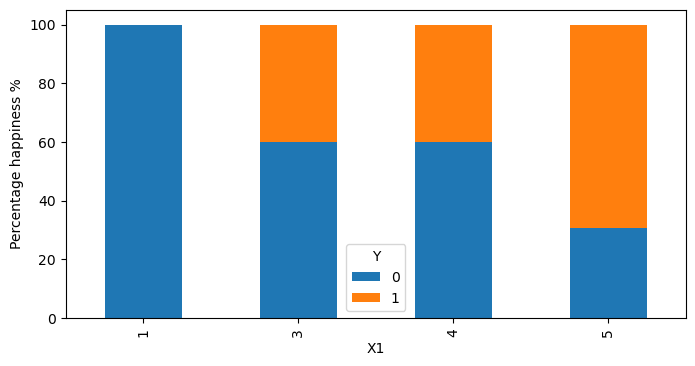

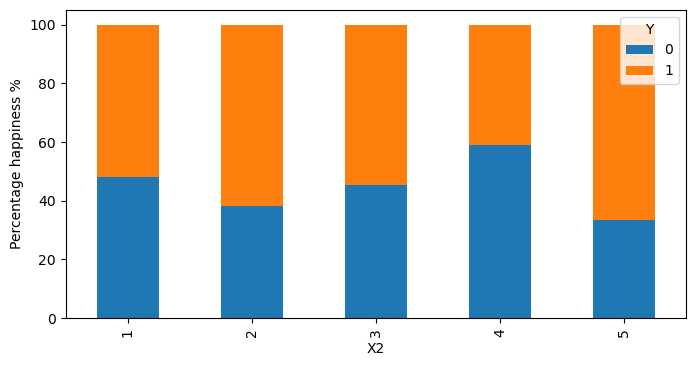

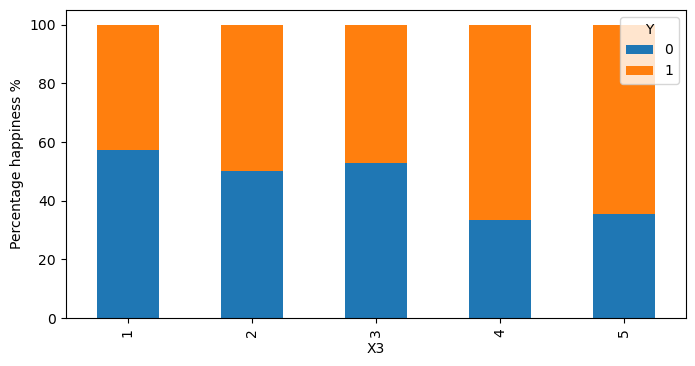

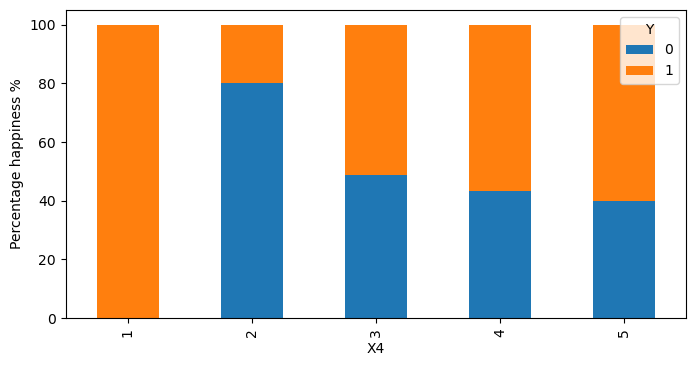

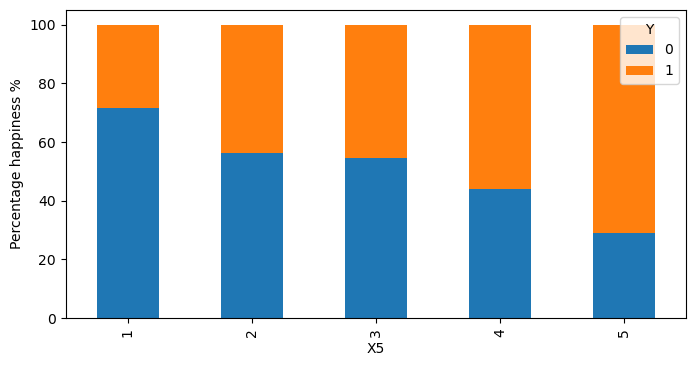

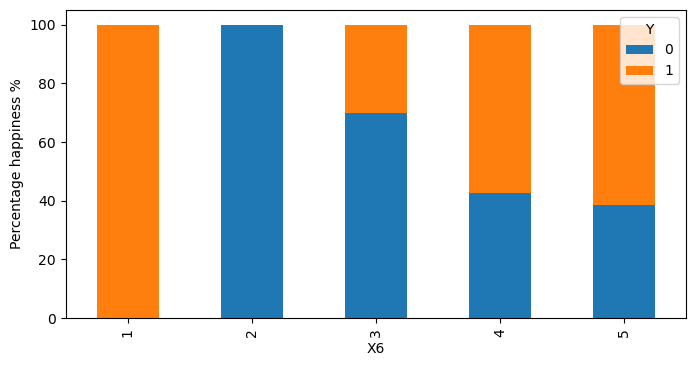

In [6]:
X_variables = ["X1", "X2", "X3","X4", "X5", "X6"]

for i in X_variables:
    (pd.crosstab(data[i],data['Y'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
    plt.ylabel('Percentage happiness %')

-  most questions as the rate increase, percent of cisutmers who like the service increase
- in questions 4 and 6 peaple  rate is 1 but at the end they still like the servies. 

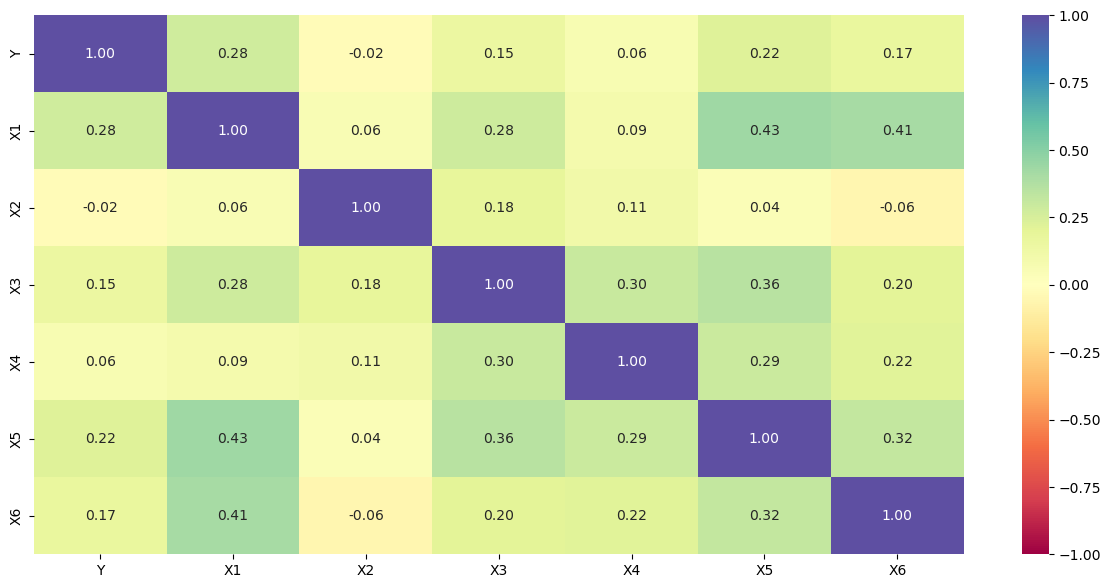

In [7]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [8]:
y = data["Y"]
X= data.drop(columns = ['Y'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [9]:
c = mutual_info_classif(X_train, Y_train)
c

array([0.04181647, 0.        , 0.        , 0.        , 0.0308132 ,
       0.        ])

In [10]:
c = pd.Series(c)
c.index = X_train.columns
c.sort_values(ascending=False)

X1    0.041816
X5    0.030813
X2    0.000000
X3    0.000000
X4    0.000000
X6    0.000000
dtype: float64

In [11]:
F_P = chi2(X_train, Y_train)
F_P

(array([1.11224060e+00, 9.27428704e-06, 1.55103952e+00, 1.65804230e-01,
        3.00745449e+00, 8.44841547e-02]),
 array([0.29159541, 0.99757015, 0.21298205, 0.68386796, 0.08288236,
        0.77131016]))

In [12]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Using Decision Tree

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.56      0.74      0.64        19
           1       0.62      0.42      0.50        19

    accuracy                           0.58        38
   macro avg       0.59      0.58      0.57        38
weighted avg       0.59      0.58      0.57        38



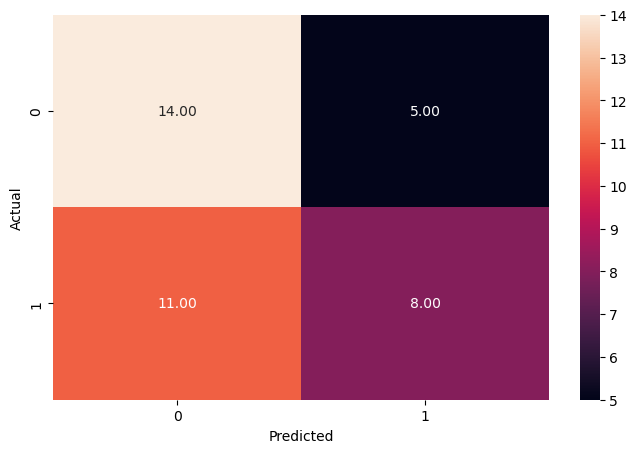

In [14]:
pred_test_dt = dt.predict(X_test)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.90      0.95        50

    accuracy                           0.94        88
   macro avg       0.94      0.95      0.94        88
weighted avg       0.95      0.94      0.94        88



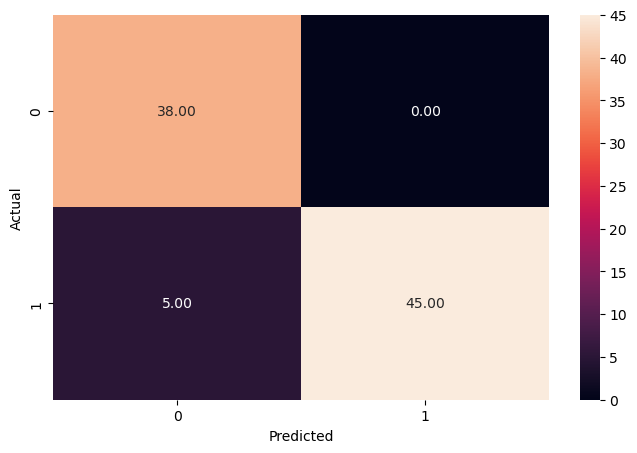

In [15]:
pred_test_dt = dt.predict(X_train)
metrics_score(Y_train, pred_test_dt)

In [16]:
parameters = [ {'max_depth': [2, 4, 6, 10], 'min_samples_leaf': [2, 3, 4, 5, 7], 'min_samples_split' : [2, 3, 4, 5]}]
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)

In [17]:
grid_search.best_score_

0.6482758620689655

In [18]:
grid_search.best_params_


{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.65      0.68      0.67        19

    accuracy                           0.66        38
   macro avg       0.66      0.66      0.66        38
weighted avg       0.66      0.66      0.66        38



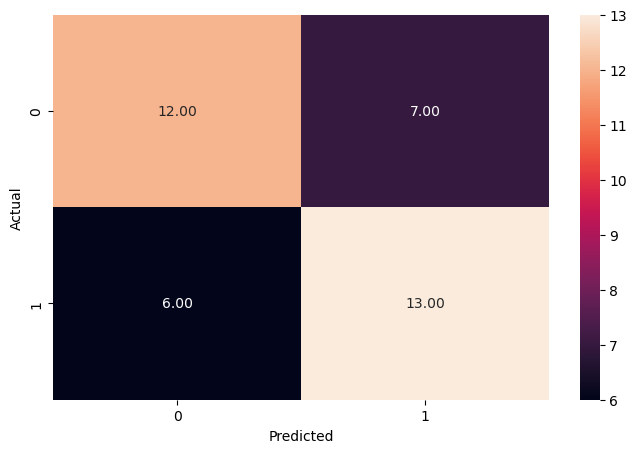

In [19]:
pred_test_dt = grid_search.predict(X_test)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.77      0.82      0.80        50

    accuracy                           0.76        88
   macro avg       0.76      0.75      0.75        88
weighted avg       0.76      0.76      0.76        88



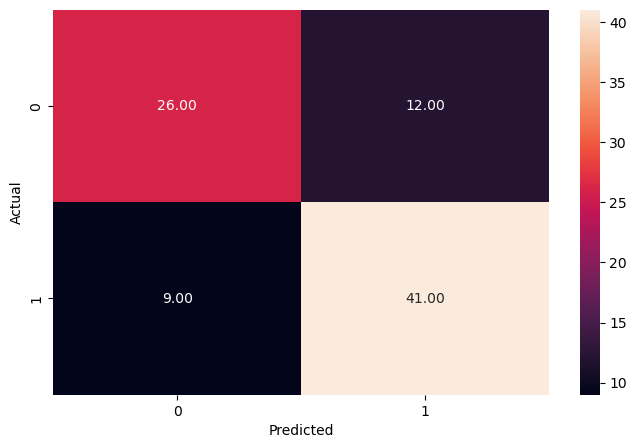

In [20]:
pred_test_dt = grid_search.predict(X_train)
metrics_score(Y_train, pred_test_dt)

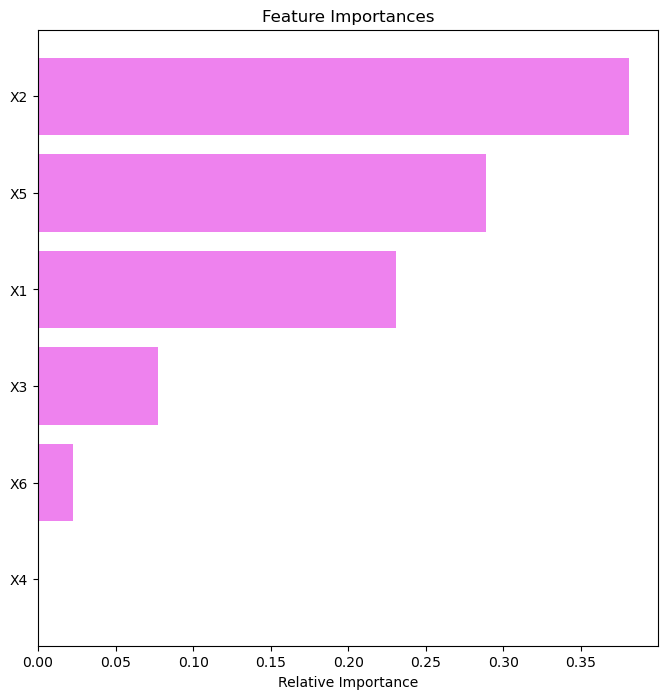

In [21]:
# importance of features in the tree building

feature_names = list(X_train.columns)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

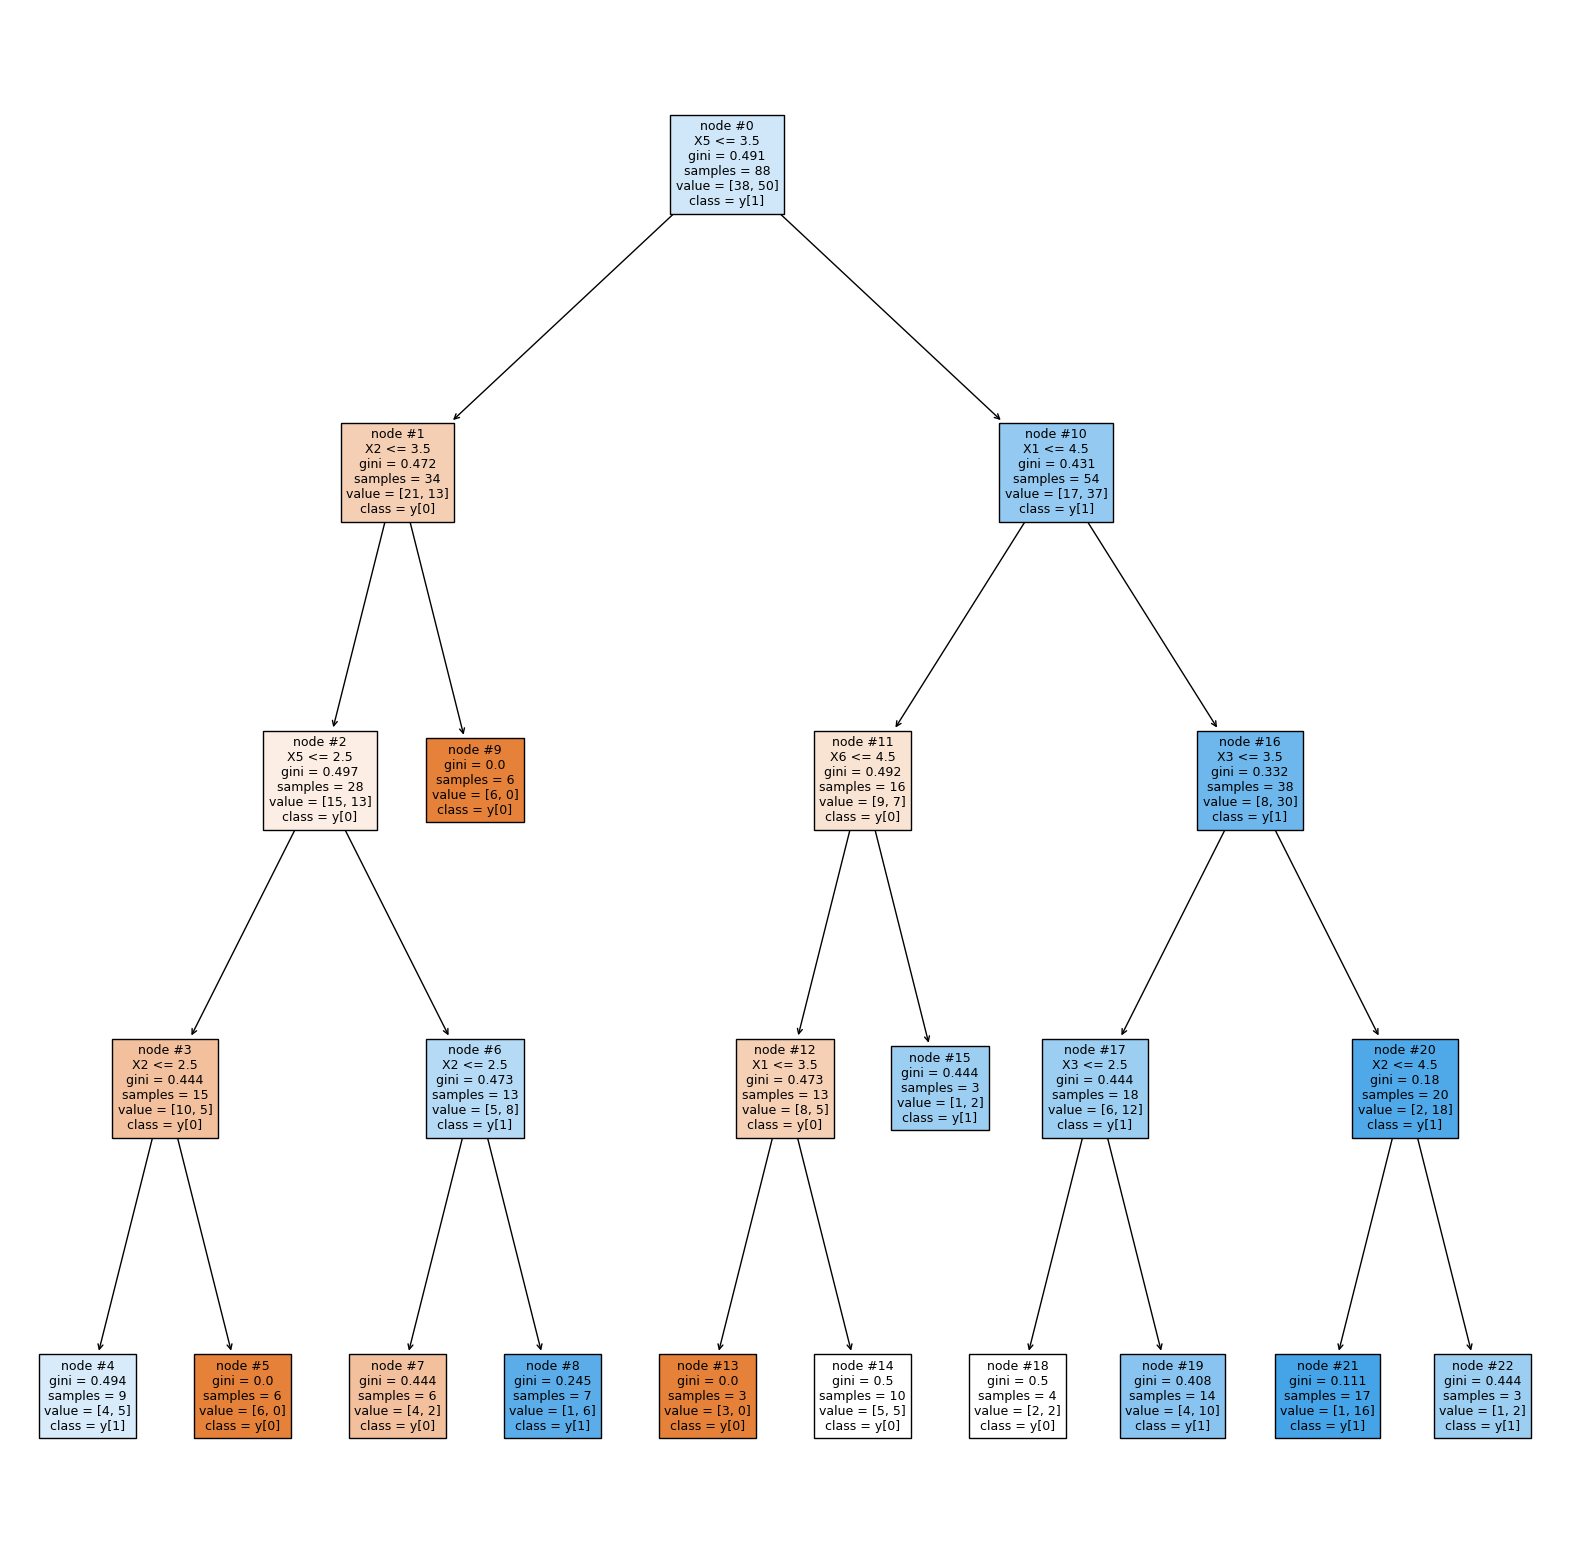

In [22]:
features = list(X.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(grid_search.best_estimator_,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [23]:
## lets try to drop X4
TrainX = X_train.drop(columns = ["X4"], axis=1)
TestX = X_test.drop(columns = ["X4"], axis=1)


In [24]:
## pruning

path = dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [25]:
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, Y_train)
    dts.append(dt)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dts[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.043485208592160374


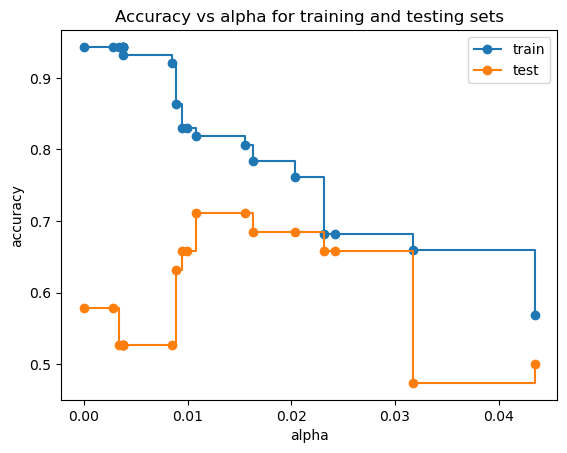

In [26]:
train_scores = [dt.score(X_train, Y_train) for dt in dts]
test_scores = [dt.score(X_test, Y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [27]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.75      0.63      0.69        19

    accuracy                           0.71        38
   macro avg       0.72      0.71      0.71        38
weighted avg       0.72      0.71      0.71        38



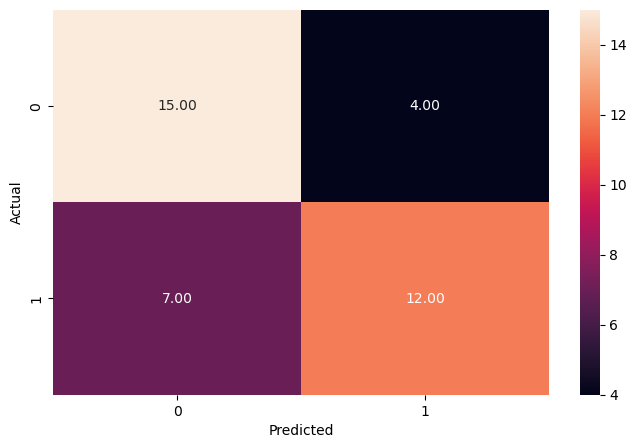

In [28]:
pred_test_dt = dt.predict(X_test)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.82      0.84      0.83        50

    accuracy                           0.81        88
   macro avg       0.80      0.80      0.80        88
weighted avg       0.81      0.81      0.81        88



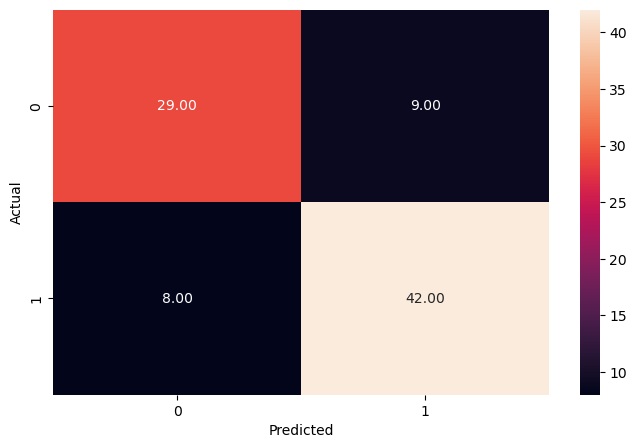

In [29]:
pred_test_dt = dt.predict(X_train)
metrics_score(Y_train, pred_test_dt)

In [30]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(TrainX,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.72      0.68      0.70        19

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



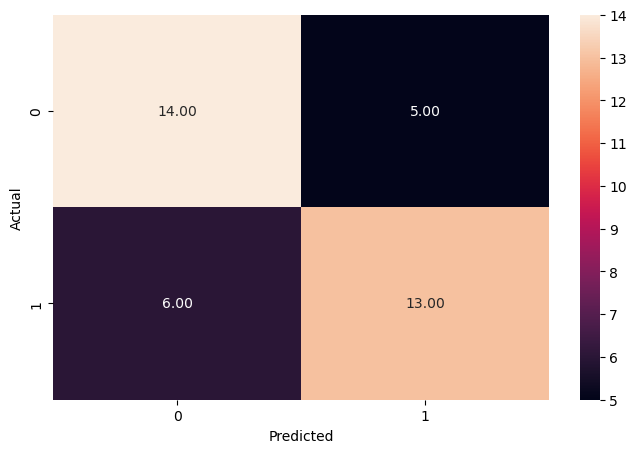

In [31]:
pred_test_dt = dt.predict(TestX)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.80      0.82      0.81        50

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



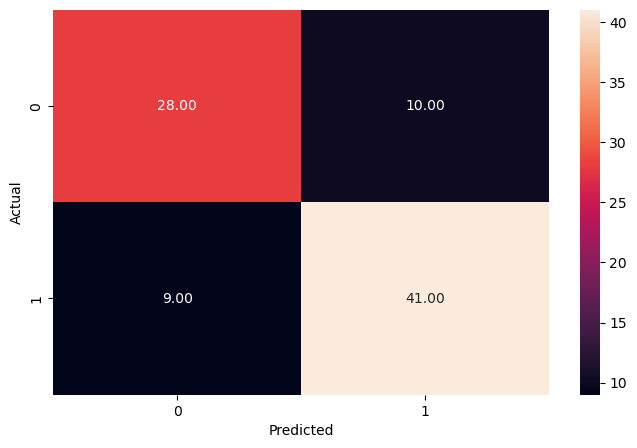

In [32]:
pred_test_dt = dt.predict(TrainX)
metrics_score(Y_train, pred_test_dt)

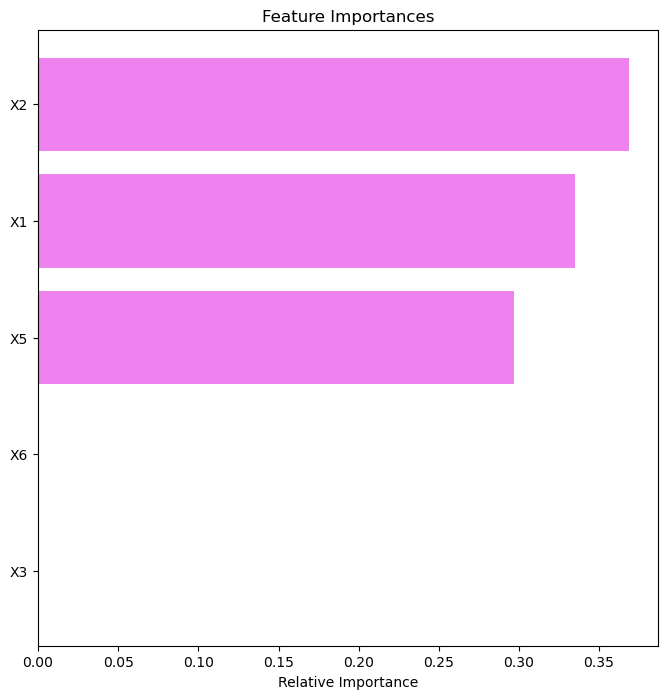

In [33]:
# importance of features in the tree building

feature_names = list(TrainX.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [34]:
## lets remove (X3 and X6)
TrainX = X_train.drop(columns = ["X3","X4", "X6"], axis=1)
TestX = X_test.drop(columns = ["X3","X4", "X6"], axis=1)

In [35]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(TrainX,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.72      0.68      0.70        19

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



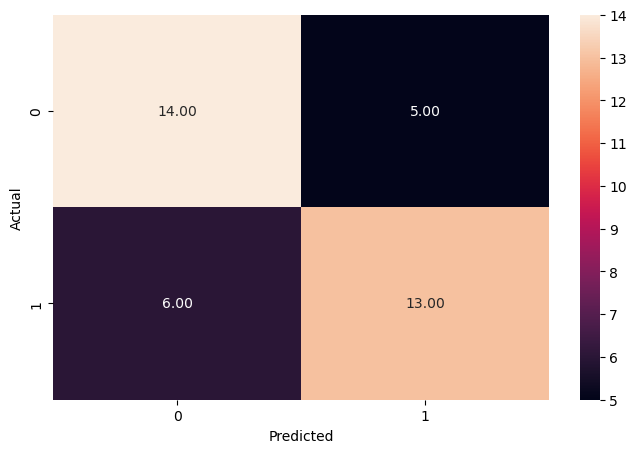

In [36]:
pred_test_dt = dt.predict(TestX)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.80      0.82      0.81        50

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



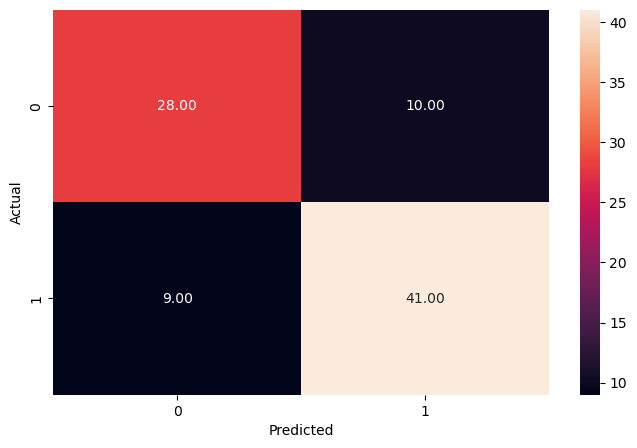

In [37]:
pred_test_dt = dt.predict(TrainX)
metrics_score(Y_train, pred_test_dt)

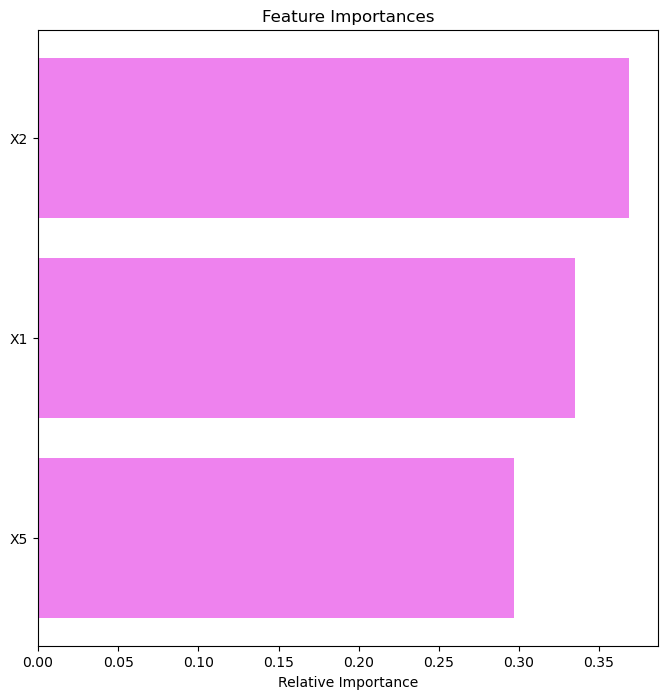

In [38]:
# importance of features in the tree building

feature_names = list(TrainX.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Lets Use KNN Classifyer


In [39]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [40]:
knnClass = KNeighborsClassifier()

In [41]:
knnClass.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
knn_test = knnClass.predict(X_test)


              precision    recall  f1-score   support

           0       0.47      0.37      0.41        19
           1       0.48      0.58      0.52        19

    accuracy                           0.47        38
   macro avg       0.47      0.47      0.47        38
weighted avg       0.47      0.47      0.47        38



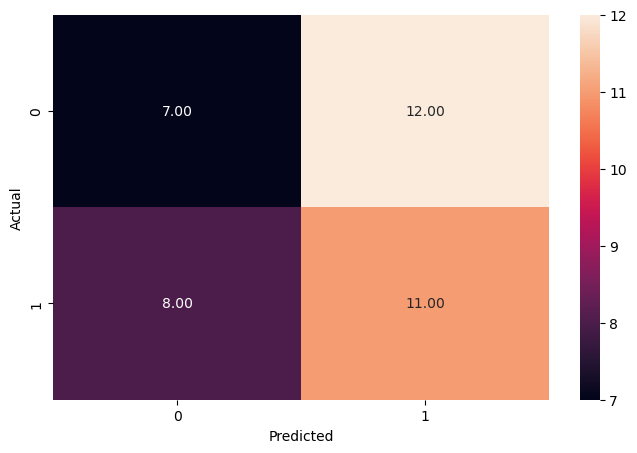

In [43]:
metrics_score(Y_test, knn_test)

In [44]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']
parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights = weights)
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search_knn = grid_search_knn.fit(X,y)

In [45]:
grid_search_knn.best_score_

0.6431451612903226

In [46]:
grid_search_knn.best_params_

{'leaf_size': 47, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

# Random Forest Algorithm


In [47]:
#List Hyperparameters that we want to tune.

n_estimators = [125, 150, 175, 200, 225, 250]
criterion=['gini', 'entropy', 'log_loss']
min_samples_split = [5, 6, 7, 8, 9]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X,y)

In [51]:
grid_search_rf.best_score_

0.5950100806451613

In [52]:
grid_search_rf.best_params_

{'criterion': 'entropy', 'min_samples_split': 8, 'n_estimators': 150}

# Using SVM

In [54]:
svc = SVC(kernel='poly', C=0.6)

In [55]:
svc.fit(X_train, Y_train)

SVC(C=0.6, kernel='poly')

In [56]:
pred_svc_test = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.59      0.68      0.63        19

    accuracy                           0.61        38
   macro avg       0.61      0.61      0.60        38
weighted avg       0.61      0.61      0.60        38



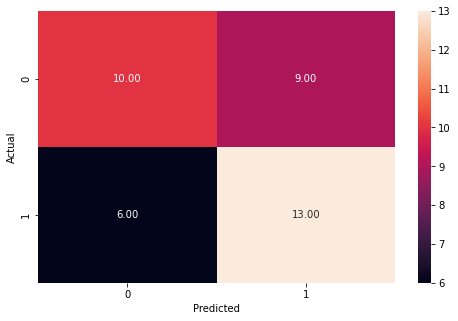

In [57]:
metrics_score(Y_test, pred_svc_test)

# Logistic Regression

In [58]:
lg=LogisticRegression()

In [59]:
lg.fit(X_train, Y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.50      0.63      0.56        19

    accuracy                           0.50        38
   macro avg       0.50      0.50      0.49        38
weighted avg       0.50      0.50      0.49        38



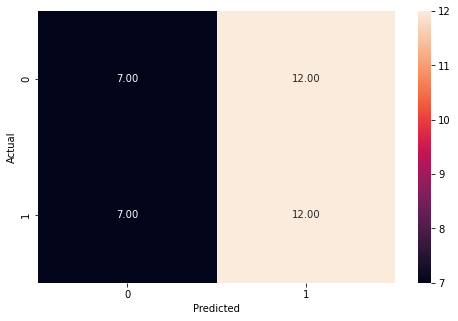

In [60]:
pred_test_lg = lg.predict(X_test)
metrics_score(Y_test, pred_test_lg)